In [1]:
import pickle
import os
import glob
import numpy as np
import json
from scipy.stats import norm

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from collections import defaultdict

In [3]:
path = "/home/jenna/sacro_results/results/"

In [4]:
os.listdir(path)

['cf7cf863-929a-4b89-962b-7913869167e4',
 'a90983a1-2329-4019-96e8-949493c3fc24',
 '315ac662-9e95-4dec-80f0-48e244f9f8e1',
 'b71b28f1-7f63-4593-bdb2-9e60dd1ac71e',
 '96c75293-2026-48af-ad99-37281cb9bb3e',
 '436c714b-b588-4894-b68c-1e0f773e5df1',
 '5238ac7b-ad85-488f-b013-9ee4e2064e60',
 'e8d7e0c4-b293-43ce-832f-c37fb8fd3b23',
 'e6a9f8f7-8024-42d5-aad5-ef726d353f3b',
 '26d9e19b-59ed-4bbb-906a-9953b5d2c825',
 'a3347182-4364-43f8-8992-2409b1b66d31',
 'f63b25f4-8df4-4336-8c02-9456eb3c09b0',
 'slinwin_processor.py',
 'e8d3eabc-edd1-414f-9d95-277df742655a',
 'b6701cb1-3a9b-456e-ad73-c6e06eea03ec']

In [5]:
# load pred and true labels. may use mode_ave for comparison
def getLabels(video):
    example_path = path + video
    pred_labels = pickle.load(open(example_path + "/seq_pred.pickle", 'rb'))
#     mode_ave_pred_labels = pickle.load(open(example_path + "/seq_mode_av.pickle", 'rb'))
    true_labels = pickle.load(open(example_path + "/seq_true.pickle", 'rb'))
    return (pred_labels, true_labels)

In [6]:
# load vanilla and extended PKI models results
pki_res_path = "./jenna_model_outputs/"
os.listdir(pki_res_path)

['vanilla_pki_output.pickle',
 'epdp_output.pickle',
 'eptp_output.pickle',
 'fepp_output.pickle']

In [7]:
# vanilla pki results
pki_output = pickle.load(open(pki_res_path + "vanilla_pki_output.pickle", 'rb'))
# extended pki with duration prior results (transition probability)
epdp_output = pickle.load(open(pki_res_path + "epdp_output.pickle", 'rb'))
# extended pki with transition timestamps prior results (phase entry probability)
eptp_output = pickle.load(open(pki_res_path + "eptp_output.pickle", 'rb'))
# fully extended pki with priors
fepp_output = pickle.load(open(pki_res_path + "fepp_output.pickle", 'rb'))

In [8]:
pki_outputs = {"vanilla":pki_output,
               "epdp":epdp_output, 
               "eptp":eptp_output, 
               "fepp":fepp_output}

In [9]:
## get all pred labels and all true labels by video name
pred_label_dict = {}
true_label_dict = {}
for video in os.listdir(path):
    if video == "slinwin_processor.py":
        continue
    pred_labels, true_labels = getLabels(video)
    pred_label_dict[video] = pred_labels
    true_label_dict[video] = true_labels

In [10]:
print(len(pred_label_dict))
print(len(true_label_dict))

14
14


In [11]:
video_names = []
for video in os.listdir(path):
    if video == "slinwin_processor.py":
        continue
    video_names.append(video)

print(len(video_names))    
print(video_names)


14
['cf7cf863-929a-4b89-962b-7913869167e4', 'a90983a1-2329-4019-96e8-949493c3fc24', '315ac662-9e95-4dec-80f0-48e244f9f8e1', 'b71b28f1-7f63-4593-bdb2-9e60dd1ac71e', '96c75293-2026-48af-ad99-37281cb9bb3e', '436c714b-b588-4894-b68c-1e0f773e5df1', '5238ac7b-ad85-488f-b013-9ee4e2064e60', 'e8d7e0c4-b293-43ce-832f-c37fb8fd3b23', 'e6a9f8f7-8024-42d5-aad5-ef726d353f3b', '26d9e19b-59ed-4bbb-906a-9953b5d2c825', 'a3347182-4364-43f8-8992-2409b1b66d31', 'f63b25f4-8df4-4336-8c02-9456eb3c09b0', 'e8d3eabc-edd1-414f-9d95-277df742655a', 'b6701cb1-3a9b-456e-ad73-c6e06eea03ec']


## Evaluation:
**video comparison**: get accuracy and f1 scores (average of per phase) for each video and compare the trend   
**per-phase evaluation**: all metrics are done per phase basis. final score reported for the metrics is the average score for that phase across all videos

In [12]:
# get accuracy across all videos
num = len(true_label_dict)
ave_pki_acc = 0
ave_epdp_acc = 0
ave_eptp_acc = 0
ave_fepp_acc = 0

#list to store accuracy for each video for plotting later
pki_acc_list = []
epdp_acc_list = []
eptp_acc_list = []
fepp_acc_list = []

for video in video_names:
    true_labels = true_label_dict[video]
    pki_acc =  accuracy_score(true_labels, pki_output[video])
    epdp_acc = accuracy_score(true_labels, epdp_output[video])
    eptp_acc = accuracy_score(true_labels, eptp_output[video])
    fepp_acc = accuracy_score(true_labels, fepp_output[video])
    
    pki_acc_list.append(pki_acc)
    epdp_acc_list.append(epdp_acc)
    eptp_acc_list.append(eptp_acc)    
    fepp_acc_list.append(fepp_acc)
    
    
    ave_pki_acc += pki_acc
    ave_epdp_acc += epdp_acc
    ave_eptp_acc += eptp_acc
    ave_fepp_acc += fepp_acc
    
    print("Video {}:".format(video))
    print("PKI acc: {}".format(pki_acc))
    print("EPDP acc: {}".format(epdp_acc))
    print("EPTP acc: {}".format(eptp_acc))
    print("FEPP acc: {}".format(fepp_acc))
    print()
    
ave_pki_acc /= num
ave_epdp_acc /= num
ave_eptp_acc /= num
ave_fepp_acc /= num
print("Average PKI acc:{}".format(ave_pki_acc))
print("Average EPDP acc:{}".format(ave_epdp_acc))
print("Average EPTP acc:{}".format(ave_eptp_acc))
print("Average FEPP acc:{}".format(ave_fepp_acc))

Video cf7cf863-929a-4b89-962b-7913869167e4:
PKI acc: 0.8003309431880861
EPDP acc: 0.8246001103143961
EPTP acc: 0.8284611141753999
FEPP acc: 0.8439051296194153

Video a90983a1-2329-4019-96e8-949493c3fc24:
PKI acc: 0.7460035523978685
EPDP acc: 0.7877442273534636
EPTP acc: 0.7984014209591475
FEPP acc: 0.8214920071047958

Video 315ac662-9e95-4dec-80f0-48e244f9f8e1:
PKI acc: 0.7378138847858198
EPDP acc: 0.7806499261447563
EPTP acc: 0.8345642540620384
FEPP acc: 0.8367799113737076

Video b71b28f1-7f63-4593-bdb2-9e60dd1ac71e:
PKI acc: 0.9234661606578115
EPDP acc: 0.9538266919671095
EPTP acc: 0.9032258064516129
FEPP acc: 0.905123339658444

Video 96c75293-2026-48af-ad99-37281cb9bb3e:
PKI acc: 0.7074370006146281
EPDP acc: 0.7338660110633067
EPTP acc: 0.8137676705593117
FEPP acc: 0.8119237861094039

Video 436c714b-b588-4894-b68c-1e0f773e5df1:
PKI acc: 0.776962582538518
EPDP acc: 0.8158473954512105
EPTP acc: 0.7997065297138665
FEPP acc: 0.8158473954512105

Video 5238ac7b-ad85-488f-b013-9ee4e2064e60

<Figure size 1080x576 with 0 Axes>

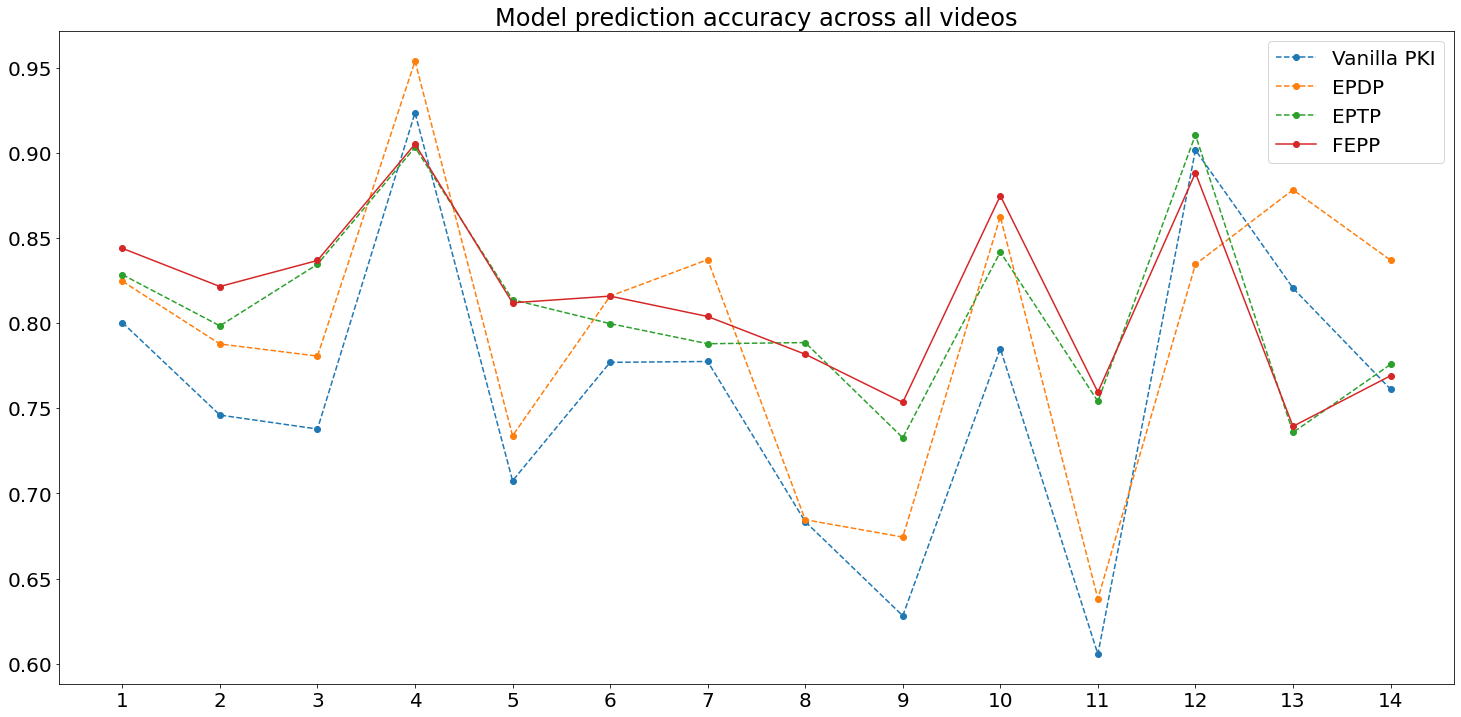

In [13]:
# plot for the accuracies across videos
##############
num = len(true_label_dict)
figure(figsize=(15, 8))
x = list(range(1, num+1, 1))
plt.figure(figsize=(25, 12))
plt.rc('font', size=20)
plt.xticks(x)  # Set label locations.
plt.plot(x, pki_acc_list, '--o',label="Vanilla PKI")
plt.plot(x, epdp_acc_list,'--o', label="EPDP")
plt.plot(x, eptp_acc_list,'--o', label="EPTP")
plt.plot(x, fepp_acc_list,'-o', label="FEPP")
plt.legend()
plt.title("Model prediction accuracy across all videos")
plt.show()

In [14]:
# Now, you need to loop through every video and document the label list and label freq
# Put above code into function
def get_label_list_and_freq(full_path):
#     pred_labels = pickle.load(open(full_path + "/seq_pred.pickle", 'rb'))
    true_labels = pickle.load(open(full_path + "/seq_true.pickle", 'rb'))
    # scan through the true labels to see whether there are early phases repeating in the later stage
    labels_list = []
    labels_freq = []
    for current_label in true_labels:
        #if list is empty or current label is not the same as the previous label, 
        #then append the current label and frequency
        if (not labels_list) or (current_label != labels_list[-1]):
            labels_list.append(current_label)
            labels_freq.append(1)
            continue
        # for the other cases, simply update frequency
        labels_freq[-1] += 1
    return (labels_list, labels_freq)


# Loop through the subdirectory and extract the label lists and frequencies
data_dict = {}
for subdir in video_names:
    full_path = path + subdir
    labels_list, labels_freq = get_label_list_and_freq(full_path)
    # store the list and corresponding frequency into a dictionary
    labels_dict = {}
    labels_dict["label list"] = labels_list
    labels_dict["label freq"] = labels_freq
    # store the label dictionary into the data dictionary under the corresponding subdirectory
    data_dict[subdir] = labels_dict
    
for vid in data_dict:
    print("{}:".format(vid))
    print("label list:{}\nlabel freq:{}".format(data_dict[vid]["label list"], data_dict[vid]["label freq"]))

cf7cf863-929a-4b89-962b-7913869167e4:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[169, 8, 593, 12, 455, 1, 24, 6, 344, 9, 192]
a90983a1-2329-4019-96e8-949493c3fc24:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 5]
label freq:[41, 16, 334, 106, 476, 4, 7, 22, 120]
315ac662-9e95-4dec-80f0-48e244f9f8e1:
label list:[1, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[84, 231, 23, 544, 24, 26, 39, 192, 7, 184]
b71b28f1-7f63-4593-bdb2-9e60dd1ac71e:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[47, 3, 846, 1, 394, 3, 23, 10, 143, 2, 109]
96c75293-2026-48af-ad99-37281cb9bb3e:
label list:[2, 1, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[146, 101, 254, 17, 550, 1, 73, 14, 190, 15, 266]
436c714b-b588-4894-b68c-1e0f773e5df1:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 3, 0, 5]
label freq:[153, 45, 348, 39, 346, 2, 51, 17, 221, 10, 131]
5238ac7b-ad85-488f-b013-9ee4e2064e60:
label list:[1, 0, 2, 0, 3, 0, 4, 0, 5]
label freq:[54, 1, 728, 28, 379, 14, 21, 62, 151]
e8d7e0c4-b293-43ce-832f-c37fb8fd3b23:
label l

In [31]:
### metrics: per-phase accuracy, per-phase f1 score, per-phase confusion matrix(?) for each model
def evalScorePerPhase(model_output_dict, data_dict, metric, is_verbose=False):
    scores_dict = {}
    for vid in data_dict:
        if is_verbose:
            print("Video {}".format(vid))
        # add a new default dict for each video to store the per_phase score
        phases_scores = {}

        # get the labels
        true_label = np.asarray(true_label_dict[vid])
        model_output = np.asarray(model_output_dict[vid])
        
        ## storage
        per_phase_f1_score = []
        cur_i = 0
        
        # use ground truth to separate the phases
        phases = data_dict[vid]["label list"]
        nums_of_frames = data_dict[vid]["label freq"]
        
        # loop through each phase and get the accuracy and f1 score
        for i, phase in enumerate(phases):
            if phase == 0:
                cur_i += nums_of_frames[i]
                continue
            
            phase_true_label = true_label[cur_i:cur_i+nums_of_frames[i]]
            phase_model_output = model_output[cur_i:cur_i+nums_of_frames[i]]
            # change all non-phase values in the prediction results to -1 for binary f1 scoring
            phase_model_output = np.where(phase_model_output!=phase, -1, phase_model_output)
            if is_verbose and vid == "a90983a1-2329-4019-96e8-949493c3fc24":
                print("Phase:{}".format(phase))
                print("Number of frames for phase {} is {}".format(phase, nums_of_frames[i]))
                print("Current index marker:{}".format(cur_i))
                print("True labels:\n {}".format(phase_true_label))
                print("This is just for checking the index correctness:{}".format(true_label[cur_i-1:cur_i+nums_of_frames[i]+1]))
                print("Model output:\n {}".format(phase_model_output))
                print()
            score = 0
            if metric == "f1":
                score = f1_score(phase_true_label, phase_model_output, pos_label=phase)
            if metric == "precision":
                score = precision_score(phase_true_label, phase_model_output, pos_label=phase)
            if metric == "recall":
                score = recall_score(phase_true_label, phase_model_output, pos_label=phase)
            if metric == "acc":
                score = accuracy_score(phase_true_label, phase_model_output)
                
#             print("Phase {} f1 score = {}".format(phase, f1))
#             print()

            # get the average metric value and add it to the dict
            if phase in phases_scores:
                phases_scores[phase] = (phases_scores[phase] + score)/2
            else:
                phases_scores[phase] = score
                
            cur_i += nums_of_frames[i]

        # add the dict under the video name
        scores_dict[vid] = phases_scores
    return scores_dict

In [32]:
# testing: evaluate per-phase f1 score for vanilla pki output
f1_score_vanilla_pki = evalScorePerPhase(pki_output, data_dict, "f1")
for vid in f1_score_vanilla_pki:
    print("{}:".format(vid))
    print("phase metric scores:{}".format(f1_score_vanilla_pki[vid]))
    print()

cf7cf863-929a-4b89-962b-7913869167e4:
phase metric scores:{1: 0.631578947368421, 2: 0.9578207381370826, 3: 0.9076579147640791, 4: 0.8, 5: 0.8901734104046243}

a90983a1-2329-4019-96e8-949493c3fc24:
phase metric scores:{1: 0.8611111111111112, 2: 0.8976897689768977, 3: 0.9339305711086227, 4: 0.0, 5: 1.0}

315ac662-9e95-4dec-80f0-48e244f9f8e1:
phase metric scores:{1: 0.9693251533742331, 2: 0.873170731707317, 3: 0.8598350415503857, 4: 0.9600000000000001, 5: 0.994535519125683}

b71b28f1-7f63-4593-bdb2-9e60dd1ac71e:
phase metric scores:{1: 1.0, 2: 0.9825616355983163, 3: 0.9412732741690903, 4: 0.6060606060606061, 5: 0.9519230769230769}

96c75293-2026-48af-ad99-37281cb9bb3e:
phase metric scores:{2: 0.788862605953085, 1: 0.6533333333333333, 3: 0.8669283502874834, 4: 0.6727272727272727, 5: 0.920892494929006}

436c714b-b588-4894-b68c-1e0f773e5df1:
phase metric scores:{1: 0.7560975609756097, 2: 1.0, 3: 0.9153692614770459, 4: 0.8666666666666666, 5: 0.8036529680365296}

5238ac7b-ad85-488f-b013-9ee4e2

In [17]:
# get the average f1 score for each phase for the given model output
def getAveScoreAcrossAllVid(vid2ScoresDict):
    scores = np.asarray([0.0]*5)
    count_phases = np.asarray([0.0]*5)
    for video in vid2ScoresDict:
        score_dict = vid2ScoresDict[video]
        for phase in range(1, 6):
            if phase in score_dict:
                count_phases[phase-1] += 1
                scores[phase-1] += score_dict[phase]
    
#     print(scores)
#     print(count_phases)
    scores /= count_phases
    return scores

In [18]:
# test: get average f1 score for vanilla pki output
f1_ave_scores = getAveScoreAcrossAllVid(f1_score_vanilla_pki)
print(f1_ave_scores)
print("Average f1 score of pki vanilla output across all videos all phases:{}".format(np.sum(f1_ave_scores)/len(f1_ave_scores)))

[0.79069985 0.91107198 0.91132008 0.65773794 0.81913617]
Average f1 score of pki vanilla output across all videos all phases:0.8179932005966574


## Get macro f1 scores for all four model outputs

In [19]:
for model_output_name in pki_outputs:
    f1_scores = evalScorePerPhase(pki_outputs[model_output_name], data_dict, "f1")
    f1_ave_scores = getAveScoreAcrossAllVid(f1_scores)
    print("Current model:{}".format(model_output_name))
    print("f1 average scores for individual phase:\n{}".format(f1_ave_scores))
    print("Average f1 score across all videos all phases:{}".format(np.sum(f1_ave_scores)/len(f1_ave_scores)))
    print()


Current model:vanilla
f1 average scores for individual phase:
[0.79069985 0.91107198 0.91132008 0.65773794 0.81913617]
Average f1 score across all videos all phases:0.8179932005966574

Current model:epdp
f1 average scores for individual phase:
[0.71994342 0.951553   0.95463159 0.36647449 0.768574  ]
Average f1 score across all videos all phases:0.7522352997356889

Current model:eptp
f1 average scores for individual phase:
[0.79780712 0.90806537 0.89740307 0.55789352 0.96407455]
Average f1 score across all videos all phases:0.8250487270744375

Current model:fepp
f1 average scores for individual phase:
[0.7839652  0.91228479 0.91955178 0.42256647 0.96196566]
Average f1 score across all videos all phases:0.8000667783517326



 ## Get accuracy for all four model outputs 

In [20]:
for model_output_name in pki_outputs:
    acc_scores = evalScorePerPhase(pki_outputs[model_output_name], data_dict, "acc")
    acc_ave_scores = getAveScoreAcrossAllVid(acc_scores)
    print("Current model:{}".format(model_output_name))
    print("Average accuracy scores for individual phase:\n{}".format(acc_ave_scores))
    print("Average accuracy across all videos all phases:{}".format(np.sum(acc_ave_scores)/len(acc_ave_scores)))
    print()

Current model:vanilla
Average accuracy scores for individual phase:
[0.73075995 0.84399274 0.84334303 0.57360231 0.75498808]
Average accuracy across all videos all phases:0.7493372240958489

Current model:epdp
Average accuracy scores for individual phase:
[0.65464991 0.91796472 0.9173383  0.26857896 0.70210093]
Average accuracy across all videos all phases:0.692126563811284

Current model:eptp
Average accuracy scores for individual phase:
[0.75496883 0.83937758 0.84755705 0.45513231 0.94212103]
Average accuracy across all videos all phases:0.7678313579814173

Current model:fepp
Average accuracy scores for individual phase:
[0.73033291 0.84600072 0.88512413 0.30267803 0.93818975]
Average accuracy across all videos all phases:0.7404651060806521



## Get precision score for all four model outputs

In [34]:
for model_output_name in pki_outputs:
    scores = evalScorePerPhase(pki_outputs[model_output_name], data_dict, "recall")
    ave_scores = getAveScoreAcrossAllVid(scores)
    print("Current model:{}".format(model_output_name))
    print("Average precision scores for individual phase:\n{}".format(ave_scores))
    print("Average precision across all videos all phases:{}".format(np.sum(ave_scores)/len(ave_scores)))
    print()

Current model:vanilla
Average precision scores for individual phase:
[0.73075995 0.84399274 0.84334303 0.57360231 0.75498808]
Average precision across all videos all phases:0.7493372240958489

Current model:epdp
Average precision scores for individual phase:
[0.65464991 0.91796472 0.9173383  0.26857896 0.70210093]
Average precision across all videos all phases:0.692126563811284

Current model:eptp
Average precision scores for individual phase:
[0.75496883 0.83937758 0.84755705 0.45513231 0.94212103]
Average precision across all videos all phases:0.7678313579814173

Current model:fepp
Average precision scores for individual phase:
[0.73033291 0.84600072 0.88512413 0.30267803 0.93818975]
Average precision across all videos all phases:0.7404651060806521



## Use precision_score with 'macro' keyword to calculate precision


In [37]:
# get accuracy across all videos
num = len(true_label_dict)
ave_pki_score = 0
ave_epdp_score = 0
ave_eptp_score = 0
ave_fepp_score = 0

#list to store accuracy for each video for plotting later
pki_list = []
epdp_list = []
eptp_list = []
fepp_list = []

for video in video_names:
    true_labels = true_label_dict[video]
    pki_score =  f1_score(true_labels, pki_output[video], average='macro')
    epdp_score = f1_score(true_labels, epdp_output[video], average='macro')
    eptp_score = f1_score(true_labels, eptp_output[video], average='macro')
    fepp_score = f1_score(true_labels, fepp_output[video], average='macro')
    
    pki_list.append(pki_score)
    epdp_list.append(epdp_score)
    eptp_list.append(eptp_score)    
    fepp_list.append(fepp_score)
    
    
    ave_pki_score += pki_score
    ave_epdp_score += epdp_score
    ave_eptp_score += eptp_score
    ave_fepp_score += fepp_score
    
    print("Video {}:".format(video))
    print("PKI score: {}".format(pki_score))
    print("EPDP score: {}".format(epdp_score))
    print("EPTP score: {}".format(eptp_score))
    print("FEPP score: {}".format(fepp_score))
    print()
    
ave_pki_score /= num
ave_epdp_score /= num
ave_eptp_score /= num
ave_fepp_score /= num
print("Average PKI score:{}".format(ave_pki_score))
print("Average EPDP score:{}".format(ave_epdp_score))
print("Average EPTP score:{}".format(ave_eptp_score))
print("Average FEPP score:{}".format(ave_fepp_score))

Video cf7cf863-929a-4b89-962b-7913869167e4:
PKI score: 0.5501810871708146
EPDP score: 0.5097057380608043
EPTP score: 0.6129485227650954
FEPP score: 0.6742103181126268

Video a90983a1-2329-4019-96e8-949493c3fc24:
PKI score: 0.49592732928511846
EPDP score: 0.5611819359432053
EPTP score: 0.5654453182454157
FEPP score: 0.5747331072897081

Video 315ac662-9e95-4dec-80f0-48e244f9f8e1:
PKI score: 0.6062457491932832
EPDP score: 0.6183764025407305
EPTP score: 0.651769068588262
FEPP score: 0.6633414561820571

Video b71b28f1-7f63-4593-bdb2-9e60dd1ac71e:
PKI score: 0.6523920554089176
EPDP score: 0.6667681091464184
EPTP score: 0.6467697036471592
FEPP score: 0.6642619915824078

Video 96c75293-2026-48af-ad99-37281cb9bb3e:
PKI score: 0.5469128794879752
EPDP score: 0.48584423914732483
EPTP score: 0.5857518081440812
FEPP score: 0.5546831908752081

Video 436c714b-b588-4894-b68c-1e0f773e5df1:
PKI score: 0.6140855051088155
EPDP score: 0.6228217086883486
EPTP score: 0.6396094796790819
FEPP score: 0.644457351

## Use precision_score with 'macro' keyword to calculate precision



In [38]:
# get accuracy across all videos
num = len(true_label_dict)
ave_pki_score = 0
ave_epdp_score = 0
ave_eptp_score = 0
ave_fepp_score = 0

#list to store accuracy for each video for plotting later
pki_list = []
epdp_list = []
eptp_list = []
fepp_list = []

for video in video_names:
    true_labels = true_label_dict[video]
    pki_score =  precision_score(true_labels, pki_output[video], average='macro')
    epdp_score = precision_score(true_labels, epdp_output[video], average='macro')
    eptp_score = precision_score(true_labels, eptp_output[video], average='macro')
    fepp_score = precision_score(true_labels, fepp_output[video], average='macro')
    
    pki_list.append(pki_score)
    epdp_list.append(epdp_score)
    eptp_list.append(eptp_score)    
    fepp_list.append(fepp_score)
    
    
    ave_pki_score += pki_score
    ave_epdp_score += epdp_score
    ave_eptp_score += eptp_score
    ave_fepp_score += fepp_score
    
    print("Video {}:".format(video))
    print("PKI score: {}".format(pki_score))
    print("EPDP score: {}".format(epdp_score))
    print("EPTP score: {}".format(eptp_score))
    print("FEPP score: {}".format(fepp_score))
    print()
    
ave_pki_score /= num
ave_epdp_score /= num
ave_eptp_score /= num
ave_fepp_score /= num
print("Average PKI score:{}".format(ave_pki_score))
print("Average EPDP score:{}".format(ave_epdp_score))
print("Average EPTP score:{}".format(ave_eptp_score))
print("Average FEPP score:{}".format(ave_fepp_score))

Video cf7cf863-929a-4b89-962b-7913869167e4:
PKI score: 0.542116621701062
EPDP score: 0.5572108880732681
EPTP score: 0.5969423111871244
FEPP score: 0.7165755072547423

Video a90983a1-2329-4019-96e8-949493c3fc24:
PKI score: 0.44669966879616635
EPDP score: 0.5107935935768114
EPTP score: 0.517579261841803
FEPP score: 0.5240209918575132

Video 315ac662-9e95-4dec-80f0-48e244f9f8e1:
PKI score: 0.5653300361950367
EPDP score: 0.6205439398866672
EPTP score: 0.6211124530628348
FEPP score: 0.6402596967122334

Video b71b28f1-7f63-4593-bdb2-9e60dd1ac71e:
PKI score: 0.6234757370976766
EPDP score: 0.7988963195073505
EPTP score: 0.6249880772060895
FEPP score: 0.7272585786205261

Video 96c75293-2026-48af-ad99-37281cb9bb3e:
PKI score: 0.5918634260038308
EPDP score: 0.5739664488788266
EPTP score: 0.5823470341781416
FEPP score: 0.5800924739126987

Video 436c714b-b588-4894-b68c-1e0f773e5df1:
PKI score: 0.6140883652116319
EPDP score: 0.7009743605970367
EPTP score: 0.6265443767830251
FEPP score: 0.66889608941

/home/jenna/jennaEnv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jenna/jennaEnv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jenna/jennaEnv/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jenna/jennaEnv/lib/python3.7/site-packages/sklearn/metrics/_classifica